In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [26]:
temp_df=pd.read_csv("./../Datasets/IMDB Dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: './../Datasets/IMDB Dataset.csv'

In [3]:
temp_df.sample(4)

,review,sentiment
11018,"Irwin Allen, past master of cinematic schlock,...",negative
31724,At a time in our culture where reality exposed...,positive
35325,Larry Burrows has the distinct feeling he's mi...,positive
45724,"Okay, so the plot is on shaky ground. Yeah, al...",positive


In [4]:
df=temp_df.iloc[:5000,:]

In [5]:
df.sample()

,review,sentiment
153,What seemed at first just another introverted ...,positive


In [6]:
df['sentiment'].value_counts()  #blance data for give code 

sentiment
negative    2532
positive    2468
Name: count, dtype: int64

<Axes: xlabel='sentiment'>

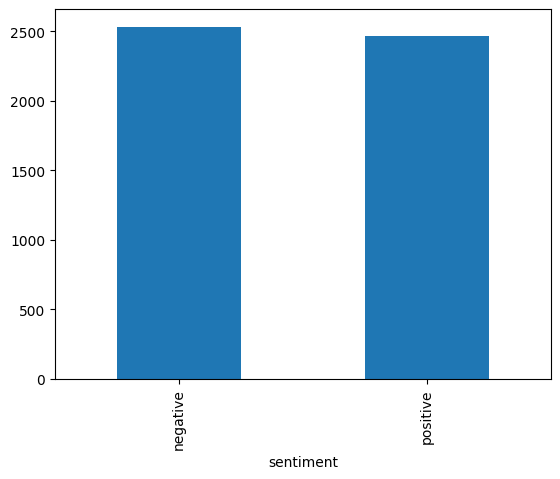

In [7]:
df['sentiment'].value_counts().plot(kind='bar')

In [8]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [ ]:
print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     5000 non-null   object
 1   sentiment  5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB
None



review       0
sentiment    0
dtype: int64

In [10]:
df.duplicated().sum()

3

In [ ]:
df = df.drop_duplicates(inplace=True)

C:\Users\raj\AppData\Local\Temp\ipykernel_5192\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [12]:
df.duplicated().sum()

0

In [ ]:
#text preprocessing 
# 1)removing HTML tages 
# 2)removing links 
# 3)Removing punction 
# 4)check spelling 
# 5)emoji working 
# 6)tokenzetion 
# 7)stemming or limetizetion 

In [14]:
#1)removing html tags 
import re 
def remove_tags(raw_text): 
    clear_text=re.sub(re.compile("<.*?>"),'',raw_text)
    return clear_text

In [15]:
df['review']=df['review'].apply(remove_tags)

C:\Users\raj\AppData\Local\Temp\ipykernel_5192\2928534252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']=df['review'].apply(remove_tags)


In [16]:
df['review'][1]

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [17]:
#1)Lower case data 
df['review'] = df['review'].str.lower()

C:\Users\raj\AppData\Local\Temp\ipykernel_5192\917267839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].str.lower()


In [18]:
df['review']

0       one of the other reviewers has mentioned that ...
1       a wonderful little production. the filming tec...
2       i thought this was a wonderful way to spend ti...
3       basically there's a family where a little boy ...
4       petter mattei's "love in the time of money" is...
                              ...                        
4995    an interesting slasher film with multiple susp...
4996    i watched this series when it first came out i...
4997    once again jet li brings his charismatic prese...
4998    i rented this movie, after hearing chris gore ...
4999    this was a big disappointment for me. i think ...
Name: review, Length: 4997, dtype: object

In [5]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords 
print(stopwords.words('english'))
def remove_stopwords(text): 
    new_text = []
    
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [20]:
# df['review'].apply(remove_stopwords)

In [21]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
4995,an interesting slasher film with multiple susp...,negative
4996,i watched this series when it first came out i...,positive
4997,once again jet li brings his charismatic prese...,positive
4998,"i rented this movie, after hearing chris gore ...",negative


In [ ]:
X=df.iloc[:,0]
y=df['sentiment']

NameError: name 'df' is not defined

In [23]:
y

0       positive
1       positive
2       positive
3       negative
4       positive
          ...   
4995    negative
4996    positive
4997    positive
4998    negative
4999    negative
Name: sentiment, Length: 4997, dtype: object

In [24]:
X

,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production. the filming tec...
2,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is..."
...,...
4995,an interesting slasher film with multiple susp...
4996,i watched this series when it first came out i...
4997,once again jet li brings his charismatic prese...
4998,"i rented this movie, after hearing chris gore ..."


In [25]:
from sklearn.preprocessing import  LabelEncoder 
encoder = LabelEncoder() 
y=encoder.fit_transform(y)

In [26]:
y

array([1, 1, 1, ..., 1, 0, 0])

In [27]:
from sklearn.model_selection import train_test_split  
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2)

In [28]:
X.shape

(4997, 1)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer()


In [30]:
X_test.shape

(1000, 1)

In [ ]:
X_train_bow=cv.fit_transform(X_train['review']).toarray()
X_test_bow=cv.transform(X_test['review']).toarray()``

In [ ]:
from sklearn.naive_bayes import GaussianNB 
gnb=GaussianNB()
gnb.fit(X_train_bow,y_train)

GaussianNB()

In [33]:
y_pred=gnb.predict(X_test_bow)
from sklearn.metrics import accuracy_score,confusion_matrix 
accuracy_score(y_test,y_pred)

0.618

In [34]:
confusion_matrix(y_test,y_pred)

array([[344, 176],
       [206, 274]], dtype=int64)

In [35]:
from sklearn.ensemble import RandomForestClassifier
clf2=RandomForestClassifier() 
clf2.fit(X_train_bow,y_train)

RandomForestClassifier()

In [36]:
y_pred2=clf2.predict(X_test_bow)
accuracy_score(y_test,y_pred2)

0.835